DEBUG: Checking skill path: c:\Users\SSAFY\projectree\projectree-inference\ProjecTree-Inference\app\agents\sub_agents\recommend\skills
DEBUG: Does it exist? True
DEBUG: Files in dir: ['tech_research']


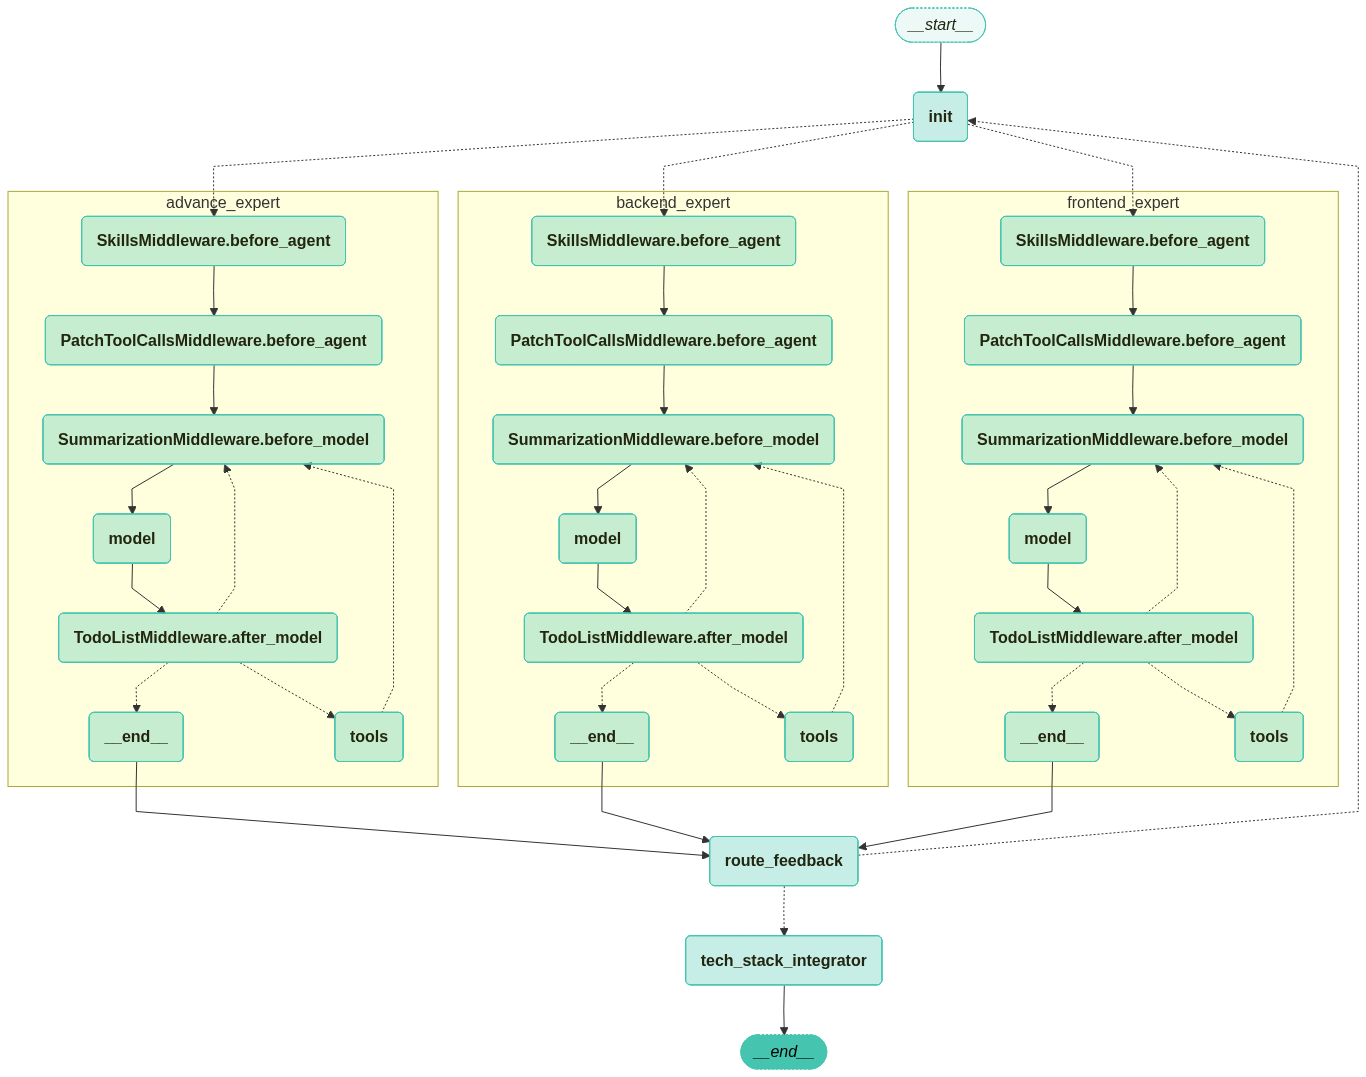

In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from app.agents.enums import TaskType
from app.agents.sub_agents.recommend.graph import recommend_graph
from app.agents.graph import builder
from langchain_teddynote.graphs import visualize_graph

visualize_graph(recommend_graph, xray=True)

In [2]:
from app.core.log import langfuse_handler

ouput = recommend_graph.invoke({
    "task_type": TaskType.BACKEND, 
    "node_name": "N : M 채팅 기능 구현", 
    "node_description": """
    1. 사용자가 입력한 채팅 메시지를 처리하고 응답을 생성
    2. 사용자의 채팅 메시지가 포함된 대화를 데이터베이스에 저장
    """
}, config={"callbacks": [langfuse_handler]})

In [3]:
# indent=4를 주어 예쁘게 출력
json_string = ouput['tech_list'].model_dump_json(indent=2)
print(json_string)

{
  "techs": [
    {
      "id": "50012",
      "name": "websocket-with-redis-pubsub",
      "advantage": "실시간 양방향 통신에 적합하고 클라이언트-서버 메시지 전달이 즉시 이루어짐. Redis Pub/Sub(또는 Redis Streams)를 사용하면 여러 WebSocket 서버 간 메시지 분산이 쉬워 수평 확장이 용이함.",
      "disadvantage": "Pub/Sub은 메시지 내구성이 약하므로 메시지 손실 위험이 있으며, Redis 단일 인스턴스는 병목이 될 수 있음. Redis 클러스터 운영과 장애 복구가 필요함.",
      "description": "서버는 WebSocket(예: RFC6455 호환 라이브러리)을 열어 클라이언트와 실시간으로 소통하고, 여러 백엔드 인스턴스 간에는 Redis Pub/Sub 또는 Redis Streams로 채팅 이벤트를 브로드캐스트/읽음으로써 N:M 채팅을 구현하는 방식입니다. 메시지 저장은 영속화 레이어(예: RDBMS 또는 NoSQL)에 별도 동기/비동기 저장합니다.",
      "ref": "https://medium.com/distributed-knowledge/scalable-web-architectures-concepts-design-6fd372ee4541",
      "recommendation_score": 5
    },
    {
      "id": "50013",
      "name": "message-broker-with-transactional-outbox",
      "advantage": "데이터 일관성 보장이 뛰어남(데이터베이스 트랜잭션과 메시지 발행 동기화). Outbox 패턴을 사용하면 DB 쓰기와 메시지 발행 간의 LostMessage 문제를 방지하여 안정적인 이벤트 전달이 가능함.",
      "disadvantage": "구현 복잡도와 운영 오버헤드 증가(Outbox 테이블 폴